# Droplet Data Analysis
## import data from Matlab csv.

# Droplet Radius Analysis

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#Import data
dropletdata = pd.read_csv('./Droplet Data_python.csv')
dropletdata.head()

,Type,Analysis,Oil rate,Water rate,droplet mean radius,droplet radius std,droplet generation rate
0,without resistor,radius,100,0.5,67.4751,0.0000,-
1,without resistor,radius,100,1.0,63.1776,0.8116,-
2,without resistor,radius,100,5.0,66.8426,0.3933,-
3,without resistor,radius,100,10.0,69.1237,0.7165,-
4,without resistor,radius,100,25.0,67.7800,0.7632,-


In [4]:
#Find without resistor data
index_wo = dropletdata['Type'].str.contains('without')
wo = dropletdata[index_wo]
wo.shape

(19, 7)

In [5]:
wo[:12]

,Type,Analysis,Oil rate,Water rate,droplet mean radius,droplet radius std,droplet generation rate
0,without resistor,radius,100,0.5,67.4751,0.0000,-
1,without resistor,radius,100,1.0,63.1776,0.8116,-
2,without resistor,radius,100,5.0,66.8426,0.3933,-
3,without resistor,radius,100,10.0,69.1237,0.7165,-
4,without resistor,radius,100,25.0,67.7800,0.7632,-
5,without resistor,radius,100,50.0,68.2338,0.6859,-
6,without resistor,radius,100,80.0,81.4791,0.7679,-
7,without resistor,radius,100,100.0,91.2646,2.0693,-
8,without resistor,radius,100,150.0,96.5684,8.6611,-
9,without resistor,generation rate,1,50.0,58.9410,0.3937,12.32


In [9]:
#Find with resistor data
index_w = dropletdata['Type'].str.contains('with resistor')
w = dropletdata[index_w]
w.shape

(19, 7)

In [10]:
w[:17]

,Type,Analysis,Oil rate,Water rate,droplet mean radius,droplet radius std,droplet generation rate
19,with resistor,radius,150,0.5,69.6897,0.3601,-
20,with resistor,radius,150,1.0,68.5425,0.4782,-
21,with resistor,radius,150,5.0,67.8440,0.8711,-
22,with resistor,radius,150,10.0,75.7475,0.4322,-
23,with resistor,radius,150,25.0,70.5393,0.5255,-
24,with resistor,radius,150,50.0,72.9029,0.4852,-
25,with resistor,radius,150,80.0,93.3998,0.5300,-
26,with resistor,radius,150,100.0,99.3945,0.4729,-
27,with resistor,radius,150,150.0,113.8585,0.6534,-
28,with resistor,generation rate,1,10.0,37.5791,0.1491,6.5


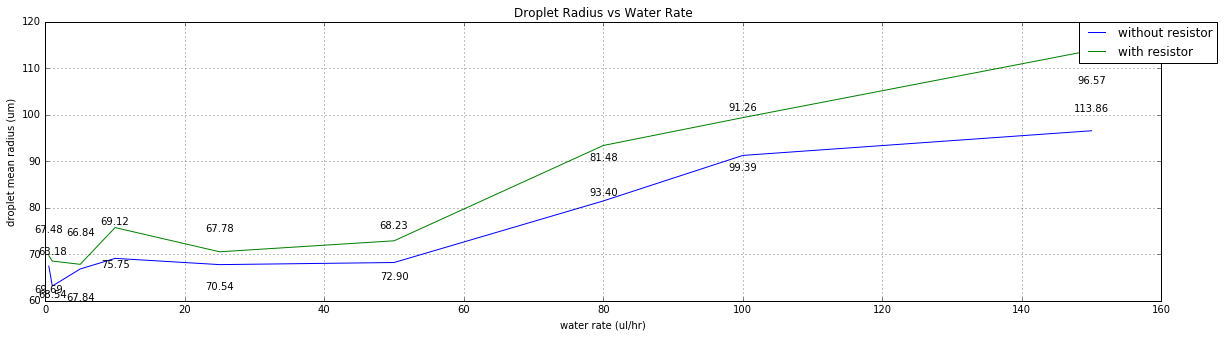

In [11]:
#Plot droplet radius vs water rate in wo & w
r = wo['Analysis'].str.contains('radius')
wo_r = wo[r]
water_rate = wo_r['Water rate'].values
radius = wo_r['droplet mean radius'].values

r1 = w['Analysis'].str.contains('radius')
w_r1 = w[r1]
water_rate1 = w_r1['Water rate'].values
radius1 = w_r1['droplet mean radius'].values

plt.figure(figsize=(20,5))
plt.plot(water_rate,radius, label = "without resistor")
plt.plot(water_rate1,radius1, label = "with resistor")
for a,b in zip(water_rate,radius):
    plt.text(a,b*1.1, '%.2f' % b , ha='center', va= 'bottom',fontsize=10)
for a,b in zip(water_rate1,radius1):
    plt.text(a,b*0.88, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)

plt.title('Droplet Radius vs Water Rate')
plt.xlabel('water rate (ul/hr)')
plt.ylabel('droplet mean radius (um)')
plt.grid(True)

plt.show

plt.savefig('Droplet Radius vs. Water Rate.jpg', dpi=100)


('Fitting Curve Equation:', poly1d([  0.21816   ,  64.44338464]))
R_square:
0.914731355291


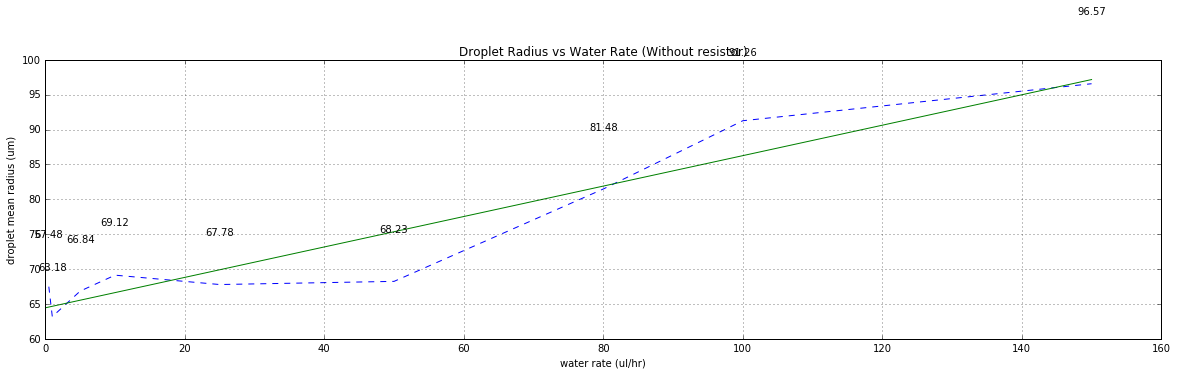

In [8]:
#Fitting Curve in Without resistor

x = np.array(water_rate)
y = np.array(radius)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
xp = np.linspace(0,150,150)
print("Fitting Curve Equation:", p)

#Calculating R^2
yhat = p(x)                         # or [p(z) for z in x]
ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
print("R_square:")
print(ssreg / sstot)

plt.figure(figsize=(20,5))
plt.plot(water_rate,radius, '--', xp, p(xp), '-')

for a,b in zip(water_rate,radius):
    plt.text(a,b*1.1, '%.2f' % b , ha='center', va= 'bottom',fontsize=10)

plt.title('Droplet Radius vs Water Rate (Without resistor)')
plt.xlabel('water rate (ul/hr)')
plt.ylabel('droplet mean radius (um)')
plt.grid(True)

plt.show

plt.savefig('Droplet Radius vs. Water Rate (Without resistor).jpg', dpi=100)

('Fitting Curve Equation:', poly1d([  0.30434726,  67.07070341]))
R_square:
0.931042735783


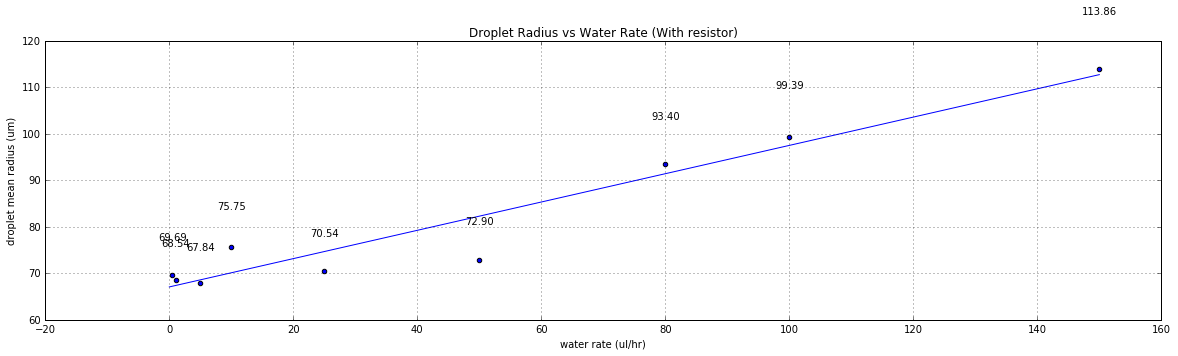

In [12]:
#Fitting Curve in Without resistor

x1 = np.array(water_rate1)
y1 = np.array(radius1)
z1 = np.polyfit(x1,y1,1)
p1 = np.poly1d(z1)
xp1 = np.linspace(0,150,150)
print("Fitting Curve Equation:", p1)

#Calculating R^2
yhat1 = p1(x1)                         # or [p(z) for z in x]
ybar1 = np.sum(y1)/len(y1)          # or sum(y)/len(y)
ssreg1 = np.sum((yhat1-ybar1)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot1 = np.sum((y1 - ybar1)**2)    # or sum([ (yi - ybar)**2 for yi in y])
print("R_square:")
print(ssreg1 / sstot1)

plt.figure(figsize=(20,5))
plt.scatter(water_rate1,radius1) 
plt.plot(xp1, p1(xp1), '-')

for a,b in zip(water_rate1,radius1):
    plt.text(a,b*1.1, '%.2f' % b , ha='center', va= 'bottom',fontsize=10)

plt.title('Droplet Radius vs Water Rate (With resistor)')
plt.xlabel('water rate (ul/hr)')
plt.ylabel('droplet mean radius (um)')
plt.grid(True)

plt.show

plt.savefig('Droplet Radius vs. Water Rate (With resistor).jpg', dpi=100)

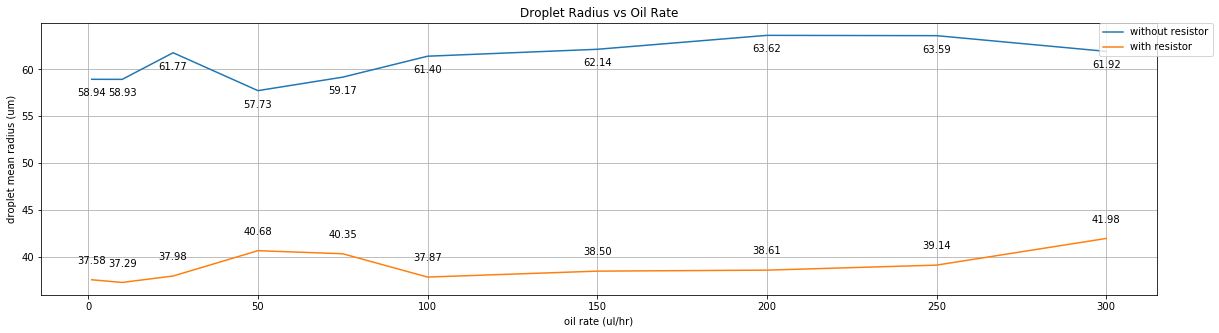

In [11]:
#Plot droplet radius vs water rate in wo & w
g = wo['Analysis'].str.contains('generation rate')
wo_g = wo[g]
oil_rate = wo_g['Oil rate'].values
radiusx = wo_g['droplet mean radius'].values

g1 = w['Analysis'].str.contains('generation rate')
w_g1 = w[g1]
oil_rate1 = w_g1['Oil rate'].values
radiusx1 = w_g1['droplet mean radius'].values

plt.figure(figsize=(20,5))
plt.plot(oil_rate,radiusx, label ="without resistor")
plt.plot(oil_rate1,radiusx1, label = "with resistor")
for a,b in zip(oil_rate,radiusx):
    plt.text(a,b-2, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)
for a,b in zip(oil_rate1,radiusx1):
    plt.text(a,b+1.5, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
    
plt.title('Droplet Radius vs Oil Rate')
plt.xlabel('oil rate (ul/hr)')
plt.ylabel('droplet mean radius (um)')
plt.grid(True)

plt.show

plt.savefig('Droplet Radius vs. Oil Rate.jpg', dpi=100)

# Droplet Generation Rate analysis

In [7]:
w

,Type,Analysis,Oil rate,Water rate,droplet mean radius,droplet radius std,droplet generation rate
19,with resistor,radius,150,0.5,69.6897,0.3601,-
20,with resistor,radius,150,1.0,68.5425,0.4782,-
21,with resistor,radius,150,5.0,67.8440,0.8711,-
22,with resistor,radius,150,10.0,75.7475,0.4322,-
23,with resistor,radius,150,25.0,70.5393,0.5255,-
24,with resistor,radius,150,50.0,72.9029,0.4852,-
25,with resistor,radius,150,80.0,93.3998,0.5300,-
26,with resistor,radius,150,100.0,99.3945,0.4729,-
27,with resistor,radius,150,150.0,113.8585,0.6534,-
28,with resistor,generation rate,1,10.0,37.5791,0.1491,6.5


In [12]:
gen_w_index = w['Analysis'].str.contains('generation rate')
gen_w = w[gen_w_index]
gen_w.shape
gen_w.head()

,Type,Analysis,Oil rate,Water rate,droplet mean radius,droplet radius std,droplet generation rate
28,with resistor,generation rate,1,10.0,37.5791,0.1491,6.5
29,with resistor,generation rate,10,10.0,37.2932,0.2054,6.491
30,with resistor,generation rate,25,10.0,37.9778,0.3879,5.088
31,with resistor,generation rate,50,10.0,40.6787,0.4818,3.863
32,with resistor,generation rate,75,10.0,40.3492,0.5768,2.523


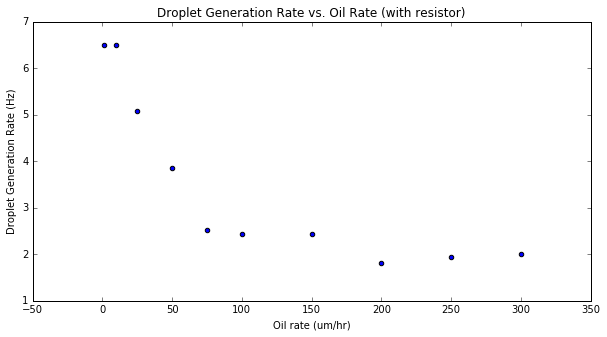

In [14]:
oilratex = gen_w['Oil rate'].values
genrate = gen_w['droplet generation rate'].values

plt.figure(figsize=(10,5))
plt.scatter(oilratex,genrate)
plt.title('Droplet Generation Rate vs. Oil Rate (with resistor)')
plt.xlabel('Oil rate (um/hr)')
plt.ylabel('Droplet Generation Rate (Hz)')

plt.savefig('Droplet Generation Rate vs. Oil Rate_w.jpg', dpi=100)

In [8]:
wo

,Type,Analysis,Oil rate,Water rate,droplet mean radius,droplet radius std,droplet generation rate
0,without resistor,radius,100,0.5,67.4751,0.0000,-
1,without resistor,radius,100,1.0,63.1776,0.8116,-
2,without resistor,radius,100,5.0,66.8426,0.3933,-
3,without resistor,radius,100,10.0,69.1237,0.7165,-
4,without resistor,radius,100,25.0,67.7800,0.7632,-
5,without resistor,radius,100,50.0,68.2338,0.6859,-
6,without resistor,radius,100,80.0,81.4791,0.7679,-
7,without resistor,radius,100,100.0,91.2646,2.0693,-
8,without resistor,radius,100,150.0,96.5684,8.6611,-
9,without resistor,generation rate,1,50.0,58.9410,0.3937,12.32


In [9]:
gen_wo = wo.iloc[9:17]

In [10]:
gen_wo

,Type,Analysis,Oil rate,Water rate,droplet mean radius,droplet radius std,droplet generation rate
9,without resistor,generation rate,1,50.0,58.9410,0.3937,12.32
10,without resistor,generation rate,10,50.0,58.9334,0.4978,11.67
11,without resistor,generation rate,25,50.0,61.7695,0.4547,7.867
12,without resistor,generation rate,50,50.0,57.7318,0.3503,8.796
13,without resistor,generation rate,75,50.0,59.1700,0.4231,8.152
14,without resistor,generation rate,100,50.0,61.4009,0.4043,7.468
15,without resistor,generation rate,150,50.0,62.1382,0.6177,6.824
16,without resistor,generation rate,200,50.0,63.6230,0.4751,2.526


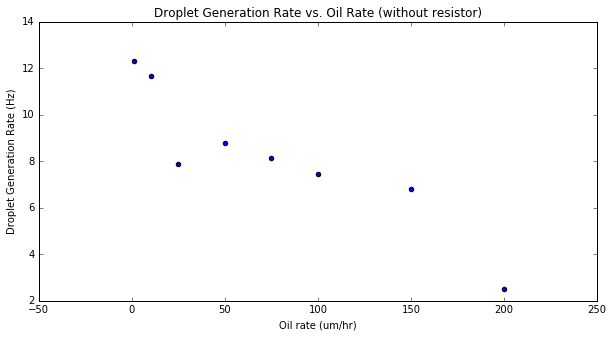

In [15]:
oilratex = gen_wo['Oil rate'].values
genrate = gen_wo['droplet generation rate'].values

plt.figure(figsize=(10,5))
plt.scatter(oilratex,genrate)
plt.title('Droplet Generation Rate vs. Oil Rate (without resistor)')
plt.xlabel('Oil rate (um/hr)')
plt.ylabel('Droplet Generation Rate (Hz)')

plt.savefig('Droplet Generation Rate vs. Oil Rate_wo.jpg', dpi=100)